## YOLO Model Training Notebook

This is a notebook for the BYU Locating Bacterial Flagellar Motors 2025 Kaggle challenge, inspired by @andrewjdarley . This notebook handles the training of YOLOv8 object detection models on our prepared dataset.

## About this Notebook

This training notebook implements a full YOLOv8 training pipeline for detecting bacterial flagellar motors in tomographic slices. The notebook:

1. **Dataset Configuration**: Sets up and validates the YOLO-format dataset YAML configuration
2. **Model Initialization**: Loads pre-trained YOLOv8n weights for transfer learning
3. **Training Process**: Fine tunes the model with early stopping and periodic checkpoints
4. **Loss Visualization**: Plots training and validation dfl loss curves to monitor progress
5. **Performance Evaluation**: Tests the trained model on random validation samples
6. **Model Export**: Saves the trained weights for use in the submission notebook

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00


In [2]:
import os
import torch
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics import YOLO
import yaml
import pandas as pd
import json
import torch.nn as nn
from ultralytics import YOLO
from ultralytics.nn.modules import Conv, C2f
from typing import List, Optional, Dict, Any, Union


# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

# Define paths for Kaggle environment
yolo_dataset_dir = "/kaggle/input/parse-data/yolo_dataset"
yolo_weights_dir = "/kaggle/working/yolo_weights"
yolo_pretrained_weights = "yolov8n.pt"  # Path to pre-downloaded weights

# Create weights directory if it doesn't exist
os.makedirs(yolo_weights_dir, exist_ok=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Starting YOLO training process...
Directory status:
- Train images dir exists: True
- Val images dir exists: True
- Train labels dir exists: True
- Val labels dir exists: True
Found original dataset.yaml at /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Fixing YAML paths in /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Created fixed YAML at /kaggle/working/fixed_dataset.yaml with path: /kaggle/input/parse-data/yolo_dataset
Using YAML file: /kaggle/working/fixed_dataset.yaml
YAML file contents:
names:
  0: motor
path: /kaggle/input/parse-data/yolo_dataset
train: images/train
val: images/val


Starting YOLO training...
Loading pre-trained weights from: yolov8n.pt


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.6MB/s]


Using standard YOLOv8 architecture
Ultralytics 8.3.119 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/fixed_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=runs/detect, name=motor_detector, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 17.2MB/s]

Overriding class names with single class.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 55.0±7.5 MB/s, size: 345.6 KB)


train: Scanning /kaggle/input/parse-data/yolo_dataset/labels/train... 3262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3262/3262 [00:12<00:00, 264.60it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 55.9±15.3 MB/s, size: 365.7 KB)


val: Scanning /kaggle/input/parse-data/yolo_dataset/labels/val... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:03<00:00, 228.83it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/motor_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/motor_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.08G      3.569      8.169      1.581         20        640: 100%|██████████| 204/204 [00:50<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.47it/s]


                   all        792        792       0.23      0.144     0.0803     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.8G      2.891      3.369      1.273         15        640: 100%|██████████| 204/204 [00:46<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


                   all        792        792      0.353      0.443      0.291     0.0733

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       2.8G      2.792      2.654      1.259         18        640: 100%|██████████| 204/204 [00:46<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        792        792      0.381      0.379      0.275     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.8G      2.698      2.427      1.212         26        640: 100%|██████████| 204/204 [00:47<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]


                   all        792        792      0.451      0.551      0.468      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.8G      2.632      2.271      1.195         22        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]

                   all        792        792      0.494      0.395      0.395      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       2.8G      2.573      2.169      1.178         24        640: 100%|██████████| 204/204 [00:46<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        792        792      0.465      0.487      0.413       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.8G      2.532      2.088      1.155         35        640: 100%|██████████| 204/204 [00:47<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]

                   all        792        792      0.576      0.499      0.519      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       2.8G      2.483      2.062      1.145         22        640: 100%|██████████| 204/204 [00:46<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.73it/s]


                   all        792        792      0.636      0.585      0.605      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       2.8G       2.45      1.982       1.13         21        640: 100%|██████████| 204/204 [00:47<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.43it/s]

                   all        792        792      0.743      0.652      0.682      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.8G      2.434      1.946      1.127         22        640: 100%|██████████| 204/204 [00:47<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.10it/s]


                   all        792        792      0.706      0.597      0.641      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.8G      2.368      1.885      1.124         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.84it/s]


                   all        792        792      0.784      0.682      0.736      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.8G      2.404      1.876      1.126         16        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]


                   all        792        792      0.654      0.564      0.607      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.8G      2.366      1.864      1.114         18        640: 100%|██████████| 204/204 [00:46<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]


                   all        792        792      0.789      0.649      0.706      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       2.8G      2.358      1.849      1.113         29        640: 100%|██████████| 204/204 [00:45<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]

                   all        792        792      0.758      0.668      0.759      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.8G       2.32      1.791      1.094         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]

                   all        792        792      0.787      0.692      0.758      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.8G      2.295      1.734      1.088         19        640: 100%|██████████| 204/204 [00:46<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]

                   all        792        792      0.749      0.712      0.749      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.8G      2.283      1.699      1.092         28        640: 100%|██████████| 204/204 [00:45<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        792        792      0.793      0.699      0.754      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.8G      2.279      1.706      1.086         21        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]

                   all        792        792      0.753      0.706      0.752      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.8G      2.283      1.707      1.087         22        640: 100%|██████████| 204/204 [00:45<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]


                   all        792        792      0.747      0.658      0.707      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.8G      2.258      1.699      1.082         23        640: 100%|██████████| 204/204 [00:45<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.48it/s]

                   all        792        792       0.74      0.713      0.753        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.8G      2.237      1.692      1.074         27        640: 100%|██████████| 204/204 [00:45<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]


                   all        792        792      0.852      0.645      0.768      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.8G      2.238      1.652      1.075         27        640: 100%|██████████| 204/204 [00:45<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        792        792      0.824      0.761      0.835      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.8G      2.207      1.617      1.059         31        640: 100%|██████████| 204/204 [00:45<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]


                   all        792        792      0.773      0.679      0.755      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.8G      2.186      1.635      1.062         23        640: 100%|██████████| 204/204 [00:45<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        792        792      0.811      0.735      0.824      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       2.8G      2.162      1.576       1.06         24        640: 100%|██████████| 204/204 [00:45<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        792        792      0.856      0.782       0.86      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.8G      2.188      1.585      1.073         29        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        792        792      0.792      0.668      0.723      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.8G      2.182      1.551       1.06         30        640: 100%|██████████| 204/204 [00:45<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.12it/s]

                   all        792        792        0.8      0.749      0.802       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.8G      2.153      1.561      1.052         17        640: 100%|██████████| 204/204 [00:45<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        792        792      0.847      0.805      0.834      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.8G      2.159      1.551       1.05         22        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.50it/s]

                   all        792        792      0.843      0.774       0.83      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.8G      2.131      1.541       1.05         23        640: 100%|██████████| 204/204 [00:46<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]


                   all        792        792      0.833      0.824      0.869      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.8G      2.148      1.535      1.047         22        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]


                   all        792        792      0.839      0.826      0.874      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.8G      2.104      1.493      1.036         27        640: 100%|██████████| 204/204 [00:45<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]

                   all        792        792      0.765      0.646      0.716      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.8G      2.084      1.489      1.039         23        640: 100%|██████████| 204/204 [00:45<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        792        792      0.843      0.734      0.821      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.8G      2.092       1.45      1.039         18        640: 100%|██████████| 204/204 [00:46<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]

                   all        792        792      0.874       0.78      0.829      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.8G       2.09      1.499      1.036         24        640: 100%|██████████| 204/204 [00:44<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        792        792      0.876      0.799      0.885       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.8G      2.104      1.475      1.045         26        640: 100%|██████████| 204/204 [00:47<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.15it/s]

                   all        792        792      0.863      0.777      0.865      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       2.8G      2.063      1.454      1.032         31        640: 100%|██████████| 204/204 [00:47<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.33it/s]


                   all        792        792      0.857      0.803      0.871      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.8G      2.082       1.45      1.037         19        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.30it/s]

                   all        792        792      0.831      0.741      0.833      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.8G      2.069      1.449      1.032         26        640: 100%|██████████| 204/204 [00:47<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]


                   all        792        792       0.75      0.711      0.741      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       2.8G      2.055      1.449      1.029         27        640: 100%|██████████| 204/204 [00:46<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.20it/s]

                   all        792        792      0.829      0.814      0.883      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.8G      2.048      1.431      1.022         23        640: 100%|██████████| 204/204 [00:46<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]

                   all        792        792      0.849      0.817      0.899      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.8G      2.084      1.445      1.031         24        640: 100%|██████████| 204/204 [00:47<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.49it/s]

                   all        792        792      0.869      0.781      0.873       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       2.8G       2.03      1.401      1.022         19        640: 100%|██████████| 204/204 [00:45<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]

                   all        792        792      0.862      0.722       0.84      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.8G      2.023      1.405      1.021         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.43it/s]


                   all        792        792       0.85      0.826      0.886      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       2.8G      2.042       1.42       1.02         25        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.09it/s]

                   all        792        792      0.859      0.814      0.881      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.8G      2.016      1.365      1.022         19        640: 100%|██████████| 204/204 [00:46<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.95it/s]

                   all        792        792      0.858      0.857      0.895      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.8G      1.984      1.378      1.016         31        640: 100%|██████████| 204/204 [00:45<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.28it/s]

                   all        792        792      0.863      0.779      0.853      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       2.8G       1.99      1.365      1.012         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.25it/s]


                   all        792        792       0.84      0.801      0.865      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       2.8G      1.997      1.368      1.017         13        640: 100%|██████████| 204/204 [00:46<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.08it/s]

                   all        792        792      0.805      0.785      0.848      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       2.8G      1.989      1.385      1.015         23        640: 100%|██████████| 204/204 [00:47<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        792        792      0.827       0.76      0.835      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.8G      2.002      1.383      1.016         22        640: 100%|██████████| 204/204 [00:46<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.16it/s]

                   all        792        792      0.818      0.835      0.882      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       2.8G      1.973      1.347      1.015         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.30it/s]

                   all        792        792      0.807      0.823      0.861      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.8G      1.983      1.367      1.009         26        640: 100%|██████████| 204/204 [00:47<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]


                   all        792        792      0.817      0.812      0.874      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       2.8G      2.014      1.369      1.017         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]


                   all        792        792      0.838       0.86      0.898      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.8G      1.957      1.333       1.01         22        640: 100%|██████████| 204/204 [00:47<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.35it/s]

                   all        792        792      0.829      0.849      0.888      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.8G      1.963      1.311      1.006         33        640: 100%|██████████| 204/204 [00:46<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        792        792      0.836      0.871      0.904      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.8G      1.972      1.352      1.012         19        640: 100%|██████████| 204/204 [00:47<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.04it/s]


                   all        792        792      0.842      0.848      0.892      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.8G      1.942      1.329          1         26        640: 100%|██████████| 204/204 [00:46<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]

                   all        792        792       0.85      0.847      0.902      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.8G      1.954      1.317      1.004         21        640: 100%|██████████| 204/204 [00:46<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.14it/s]


                   all        792        792       0.77      0.779      0.834      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.8G       1.94      1.303      1.002         27        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]

                   all        792        792      0.854      0.854      0.888      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       2.8G      1.947      1.308     0.9973         25        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.40it/s]

                   all        792        792      0.842      0.866      0.905      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.8G      1.912      1.285      1.001         35        640: 100%|██████████| 204/204 [00:46<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.10it/s]

                   all        792        792      0.845       0.87      0.891      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.8G      1.893      1.284     0.9974         19        640: 100%|██████████| 204/204 [00:45<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.82it/s]

                   all        792        792      0.845      0.886      0.904      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.8G      1.927      1.293     0.9962         28        640: 100%|██████████| 204/204 [00:46<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        792        792      0.853      0.818      0.893      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.8G      1.917      1.283     0.9941         29        640: 100%|██████████| 204/204 [00:47<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.32it/s]

                   all        792        792       0.84       0.87        0.9      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.8G      1.888      1.274     0.9922         24        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        792        792      0.834       0.84      0.883      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.8G      1.912       1.27     0.9979         27        640: 100%|██████████| 204/204 [00:47<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.38it/s]

                   all        792        792      0.849      0.847      0.901      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.8G      1.916      1.298     0.9924         27        640: 100%|██████████| 204/204 [00:47<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.19it/s]


                   all        792        792      0.847      0.854      0.898      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.8G      1.881      1.263     0.9862         25        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.36it/s]

                   all        792        792      0.825      0.856       0.89      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.8G      1.848      1.241     0.9822         17        640: 100%|██████████| 204/204 [00:46<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.06it/s]

                   all        792        792      0.835      0.867      0.888      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.8G      1.861       1.24     0.9847         21        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.22it/s]

                   all        792        792      0.832      0.854       0.89       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       2.8G       1.85      1.254     0.9787         16        640: 100%|██████████| 204/204 [00:46<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.32it/s]

                   all        792        792      0.844      0.837      0.882      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.8G      1.877      1.256      0.989         21        640: 100%|██████████| 204/204 [00:46<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        792        792      0.838      0.861      0.905      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.8G      1.887      1.237     0.9869         24        640: 100%|██████████| 204/204 [00:48<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.34it/s]

                   all        792        792      0.844      0.818       0.88      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       2.8G      1.852      1.246     0.9829         20        640: 100%|██████████| 204/204 [00:46<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.30it/s]

                   all        792        792       0.82      0.822      0.879      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.8G      1.871      1.243     0.9844         25        640: 100%|██████████| 204/204 [00:47<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.30it/s]

                   all        792        792      0.845      0.809      0.869      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.8G      1.858      1.242     0.9821         20        640: 100%|██████████| 204/204 [00:46<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.55it/s]

                   all        792        792      0.866       0.85      0.913      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.8G      1.834      1.228     0.9747         19        640: 100%|██████████| 204/204 [00:46<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]

                   all        792        792      0.857      0.857      0.898      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       2.8G      1.815      1.206     0.9681         24        640: 100%|██████████| 204/204 [00:48<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.18it/s]


                   all        792        792      0.853       0.86      0.891       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.8G      1.841      1.217     0.9774         28        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.09it/s]

                   all        792        792      0.863      0.866      0.898      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       2.8G      1.807        1.2     0.9708         22        640: 100%|██████████| 204/204 [00:47<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.33it/s]

                   all        792        792      0.853      0.855      0.888      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       2.8G      1.819      1.205     0.9732         20        640: 100%|██████████| 204/204 [00:47<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]

                   all        792        792      0.856       0.86      0.898      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.8G      1.792      1.187     0.9655         24        640: 100%|██████████| 204/204 [00:47<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.20it/s]

                   all        792        792      0.859       0.87      0.896      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       2.8G      1.805      1.203     0.9711         21        640: 100%|██████████| 204/204 [00:47<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.08it/s]

                   all        792        792      0.867      0.871      0.902      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.8G      1.813      1.208     0.9691         22        640: 100%|██████████| 204/204 [00:46<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.26it/s]

                   all        792        792      0.845      0.869      0.899      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.8G      1.822      1.192     0.9714         20        640: 100%|██████████| 204/204 [00:46<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.57it/s]

                   all        792        792      0.849      0.883      0.903      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.8G      1.796      1.161     0.9706         20        640: 100%|██████████| 204/204 [00:46<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.42it/s]

                   all        792        792      0.834      0.875      0.888      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       2.8G      1.804      1.183     0.9744         17        640: 100%|██████████| 204/204 [00:46<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]

                   all        792        792      0.845      0.871      0.894      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.8G      1.803      1.187     0.9719         20        640: 100%|██████████| 204/204 [00:45<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.20it/s]

                   all        792        792      0.862      0.885      0.912      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.8G      1.788      1.165     0.9718         29        640: 100%|██████████| 204/204 [00:46<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.10it/s]

                   all        792        792      0.853      0.881      0.906      0.473


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.8G      1.545     0.8851     0.9401         13        640: 100%|██████████| 204/204 [00:39<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.29it/s]

                   all        792        792      0.857      0.871      0.901      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.8G      1.505     0.8605     0.9372         14        640: 100%|██████████| 204/204 [00:37<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.49it/s]

                   all        792        792      0.836      0.895      0.911      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.8G      1.506     0.8749     0.9394         14        640: 100%|██████████| 204/204 [00:37<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.24it/s]

                   all        792        792      0.842       0.86      0.901      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.8G      1.488     0.8579     0.9332         12        640: 100%|██████████| 204/204 [00:38<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]

                   all        792        792      0.848       0.87       0.91      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.8G      1.497     0.8426      0.935         12        640: 100%|██████████| 204/204 [00:38<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.37it/s]

                   all        792        792       0.85      0.875      0.915      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.8G      1.483      0.857     0.9304         13        640: 100%|██████████| 204/204 [00:38<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.13it/s]

                   all        792        792       0.85      0.867      0.912      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.8G        1.5     0.8506     0.9395         12        640: 100%|██████████| 204/204 [00:37<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.98it/s]

                   all        792        792      0.849      0.864      0.906      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.8G      1.468     0.8402     0.9241         14        640: 100%|██████████| 204/204 [00:37<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        792        792      0.845      0.876      0.912      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.8G      1.483     0.8361     0.9308         13        640: 100%|██████████| 204/204 [00:37<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.27it/s]

                   all        792        792      0.857      0.874      0.916      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.8G       1.46     0.8388     0.9239         14        640: 100%|██████████| 204/204 [00:37<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.57it/s]

                   all        792        792      0.852      0.876      0.913      0.458



100 epochs completed in 1.450 hours.
Optimizer stripped from runs/detect/motor_detector/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/motor_detector/weights/best.pt, 6.3MB

Validating runs/detect/motor_detector/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.83it/s]


                   all        792        792      0.862      0.885      0.912       0.49


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/motor_detector
Loss curve saved to runs/detect/motor_detector/dfl_loss_curve.png

Best model found at epoch 91 with validation DFL loss: 0.8656

Training complete!

Running predictions on sample images...

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_ba9b3d_z0138_y0856_x0343.jpg: 640x640 1 item, 5.9ms
Speed: 2.7ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_285d15_z0135_y0391_x0611.jpg: 640x640 1 item, 6.1ms
Speed: 2.6ms preprocess, 6.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_ff505c_z0112_y0816_x0678.jpg: 640x640 1 item, 6.1ms
Speed: 2.5ms preprocess, 6.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_data

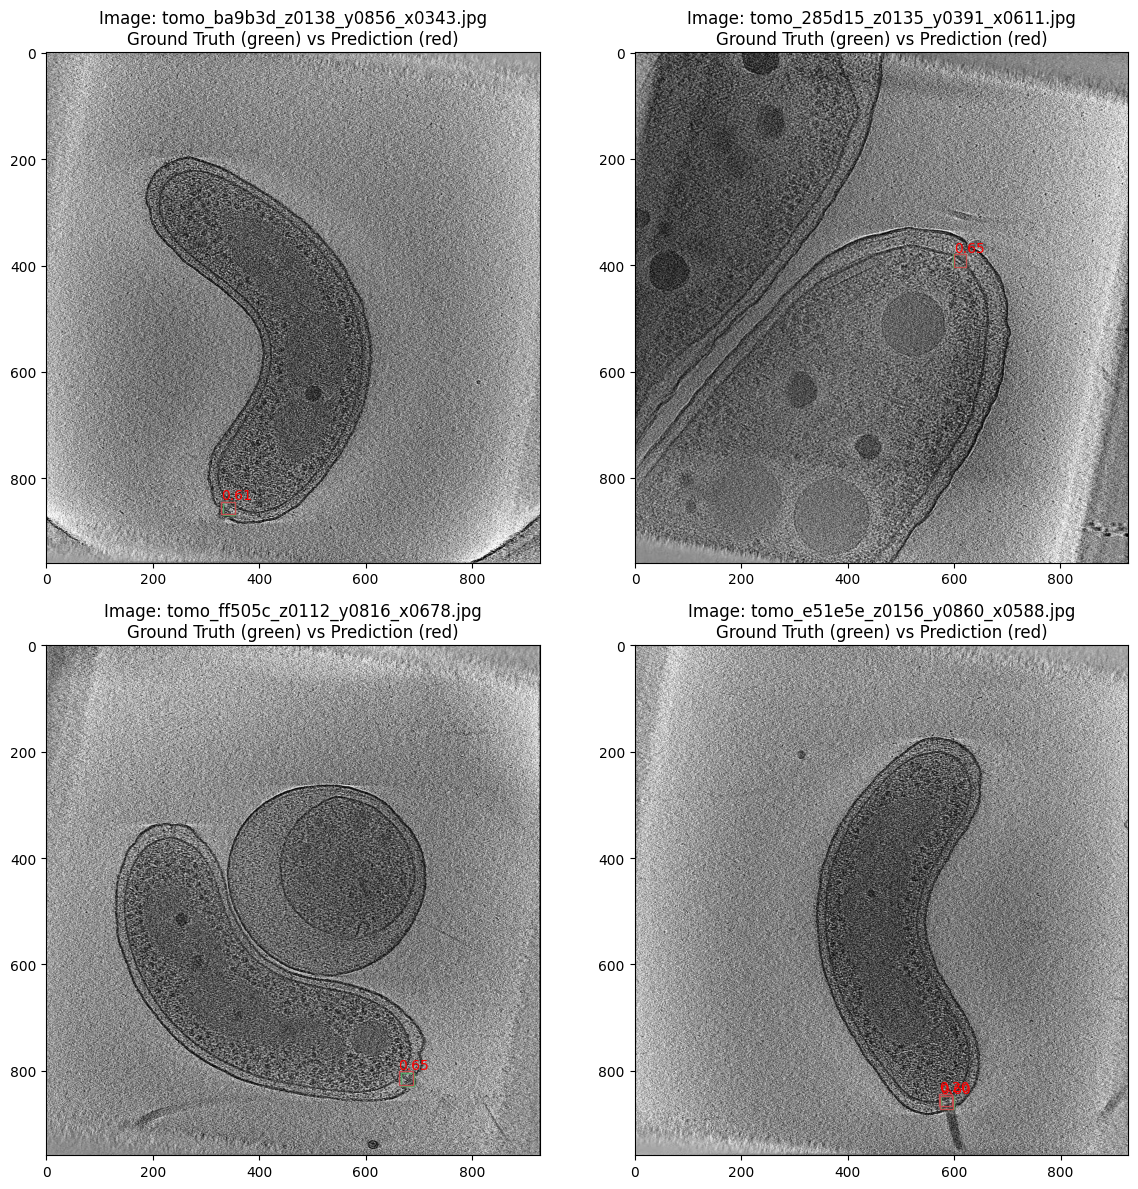

In [4]:
def fix_yaml_paths(yaml_path):
    """
    Fix the paths in the YAML file to match the actual Kaggle directories
    
    Args:
        yaml_path (str): Path to the original dataset YAML file
        
    Returns:
        str: Path to the fixed YAML file
    """
    print(f"Fixing YAML paths in {yaml_path}")
    
    # Read the original YAML
    with open(yaml_path, 'r') as f:
        yaml_data = yaml.safe_load(f)
    
    # Update paths to use actual dataset location
    if 'path' in yaml_data:
        yaml_data['path'] = yolo_dataset_dir
    
    # Create a new fixed YAML in the working directory
    fixed_yaml_path = "/kaggle/working/fixed_dataset.yaml"
    with open(fixed_yaml_path, 'w') as f:
        yaml.dump(yaml_data, f)
    
    print(f"Created fixed YAML at {fixed_yaml_path} with path: {yaml_data.get('path')}")
    return fixed_yaml_path

def plot_dfl_loss_curve(run_dir):
    """
    Plot the DFL loss curves for train and validation, marking the best model
    
    Args:
        run_dir (str): Directory where the training results are stored
    """
    # Path to the results CSV file
    results_csv = os.path.join(run_dir, 'results.csv')
    
    if not os.path.exists(results_csv):
        print(f"Results file not found at {results_csv}")
        return
    
    # Read results CSV
    results_df = pd.read_csv(results_csv)
    
    # Check if DFL loss columns exist
    train_dfl_col = [col for col in results_df.columns if 'train/dfl_loss' in col]
    val_dfl_col = [col for col in results_df.columns if 'val/dfl_loss' in col]
    
    if not train_dfl_col or not val_dfl_col:
        print("DFL loss columns not found in results CSV")
        print(f"Available columns: {results_df.columns.tolist()}")
        return
    
    train_dfl_col = train_dfl_col[0]
    val_dfl_col = val_dfl_col[0]
    
    # Find the epoch with the best validation loss
    best_epoch = results_df[val_dfl_col].idxmin()
    best_val_loss = results_df.loc[best_epoch, val_dfl_col]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot training and validation losses
    plt.plot(results_df['epoch'], results_df[train_dfl_col], label='Train DFL Loss')
    plt.plot(results_df['epoch'], results_df[val_dfl_col], label='Validation DFL Loss')
    
    # Mark the best model with a vertical line
    plt.axvline(x=results_df.loc[best_epoch, 'epoch'], color='r', linestyle='--', 
                label=f'Best Model (Epoch {int(results_df.loc[best_epoch, "epoch"])}, Val Loss: {best_val_loss:.4f})')
    
    # Add labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('DFL Loss')
    plt.title('Training and Validation DFL Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot in the same directory as weights
    plot_path = os.path.join(run_dir, 'dfl_loss_curve.png')
    plt.savefig(plot_path)
    
    # Also save it to the working directory for easier access
    plt.savefig(os.path.join('/kaggle/working', 'dfl_loss_curve.png'))
    
    print(f"Loss curve saved to {plot_path}")
    plt.close()
    
    # Return the best epoch info
    return best_epoch, best_val_loss

def train_yolo_model(yaml_path, pretrained_weights_path, epochs=30, batch_size=16, img_size=640, 
                     yolo_weights_dir='runs/detect', devices=0):
    """
    Train a YOLO model on the prepared dataset
    
    Args:
        yaml_path (str): Path to the dataset YAML file
        pretrained_weights_path (str): Path to pre-downloaded weights file
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
        img_size (int): Image size for training
        yolo_weights_dir (str): Directory to save training results
    """
    print(f"Loading pre-trained weights from: {pretrained_weights_path}")
    
    # Load the standard YOLOv8 model
    model = YOLO(pretrained_weights_path)
    
    
    print("Using standard YOLOv8 architecture")
    
    # Train the model with early stopping
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=img_size,
        project=yolo_weights_dir,
        device=devices,
        name='motor_detector',
        exist_ok=True,
         # patience=10,              # Removing the early stopping
        save_period=2,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True,             # Show detailed output during training
        single_cls=True,
        degrees=180,                # Our custom based augmentation techinique in an attempt to make the model better, rotating the image 180 degrees
        translate=0.2,                 # Randomly Shifts the Image 
        shear=2.0,                      # Shear transformation, Adds minor geometric distortion, simulating different viewing angles or slants.
        perspective=0.001,              # Adding a perspective warp
        flipud=0.5,                     # Vertically flippin the image with 50% probability
        fliplr=0.5,                     # Horizontally flipping the image with 50% probability
        mixup=0.25                      # With 25% probability, mixes two training images and their labels by blending them.
    )
    
    # Get the path to the run directory
    run_dir = os.path.join(yolo_weights_dir, 'motor_detector')
    
    # Plot and save the loss curve
    best_epoch_info = plot_dfl_loss_curve(run_dir)
    
    if best_epoch_info:
        best_epoch, best_val_loss = best_epoch_info
        print(f"\nBest model found at epoch {best_epoch} with validation DFL loss: {best_val_loss:.4f}")
    
    return model, results


def predict_on_samples(model, num_samples=4, conf_threshold=0.25):
    """
    Run predictions on random validation samples and display results
    
    Args:
        model: Trained YOLO model
        num_samples (int): Number of random samples to test
    """
    # Get validation images
    val_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    if not os.path.exists(val_dir):
        print(f"Validation directory not found at {val_dir}")
        # Try train directory instead if val doesn't exist
        val_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
        print(f"Using train directory for predictions instead: {val_dir}")
        
    if not os.path.exists(val_dir):
        print("No images directory found for predictions")
        return
    
    val_images = os.listdir(val_dir)
    
    if len(val_images) == 0:
        print("No images found for prediction")
        return
    
    # Select random samples
    num_samples = min(num_samples, len(val_images))
    samples = random.sample(val_images, num_samples)
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for i, img_file in enumerate(samples):
        if i >= len(axes):
            break
            
        img_path = os.path.join(val_dir, img_file)
        
        # Run prediction
        results = model.predict(img_path, conf=conf_threshold, batch=4)[0]
        
        # Load and display the image
        img = Image.open(img_path)
        axes[i].imshow(np.array(img), cmap='gray')
        
        # Draw ground truth box if available (from filename)
        try:
            # This assumes your filenames contain coordinates in a specific format
            parts = img_file.split('_')
            y_part = [p for p in parts if p.startswith('y')]
            x_part = [p for p in parts if p.startswith('x')]
            
            if y_part and x_part:
                y_gt = int(y_part[0][1:])
                x_gt = int(x_part[0][1:].split('.')[0])
                
                box_size = 24
                rect_gt = Rectangle((x_gt - box_size//2, y_gt - box_size//2), 
                              box_size, box_size, 
                              linewidth=1, edgecolor='g', facecolor='none')
                axes[i].add_patch(rect_gt)
        except:
            pass  # Skip ground truth if parsing fails
        
        # Draw predicted boxes (red)
        if len(results.boxes) > 0:
            boxes = results.boxes.xyxy.cpu().numpy()
            confs = results.boxes.conf.cpu().numpy()
            
            for box, conf in zip(boxes, confs):
                x1, y1, x2, y2 = box
                rect_pred = Rectangle((x1, y1), x2-x1, y2-y1, 
                                     linewidth=1, edgecolor='r', facecolor='none')
                axes[i].add_patch(rect_pred)
                axes[i].text(x1, y1-5, f'{conf:.2f}', color='red')
        
        axes[i].set_title(f"Image: {img_file}\nGround Truth (green) vs Prediction (red)")
    
    plt.tight_layout()
    
    # Save the predictions plot
    plt.savefig(os.path.join('/kaggle/working', 'predictions.png'))
    plt.show()

# Check and create a dataset YAML if needed
def prepare_dataset():
    """
    Check if dataset exists and create a proper YAML if needed
    
    Returns:
        str: Path to the YAML file to use for training
    """
    # Check if images exist
    train_images_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
    val_images_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    train_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'train')
    val_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'val')
    
    # Print directory existence status
    print(f"Directory status:")
    print(f"- Train images dir exists: {os.path.exists(train_images_dir)}")
    print(f"- Val images dir exists: {os.path.exists(val_images_dir)}")
    print(f"- Train labels dir exists: {os.path.exists(train_labels_dir)}")
    print(f"- Val labels dir exists: {os.path.exists(val_labels_dir)}")
    
    # Check for original YAML file
    original_yaml_path = os.path.join(yolo_dataset_dir, 'dataset.yaml')
    
    if os.path.exists(original_yaml_path):
        print(f"Found original dataset.yaml at {original_yaml_path}")
        # Fix the paths in the YAML
        return fix_yaml_paths(original_yaml_path)
    else:
        print(f"Original dataset.yaml not found, creating a new one")
        
        # Create a new YAML file
        yaml_data = {
            'path': yolo_dataset_dir,
            'train': 'images/train',
            'val': 'images/train' if not os.path.exists(val_images_dir) else 'images/val',
            'names': {0: 'motor'}
        }
        
        new_yaml_path = "/kaggle/working/dataset.yaml"
        with open(new_yaml_path, 'w') as f:
            yaml.dump(yaml_data, f)
            
        print(f"Created new YAML at {new_yaml_path}")
        return new_yaml_path

# Main execution
def main():
    print("Starting YOLO training process...")
    
    # Prepare dataset and get YAML path
    yaml_path = prepare_dataset()
    print(f"Using YAML file: {yaml_path}")
    
    # Print YAML file contents
    with open(yaml_path, 'r') as f:
        yaml_content = f.read()
    print(f"YAML file contents:\n{yaml_content}")
    
    # Train model
    print("\nStarting YOLO training...")
    model, results = train_yolo_model(
        yaml_path,
        pretrained_weights_path=yolo_pretrained_weights,
        epochs=100,  # Using 30 epochs instead of 100 for faster training
        devices=0
    )
    
    print("\nTraining complete!")
    
    # Run predictions
    print("\nRunning predictions on sample images...")
    predict_on_samples(model, num_samples=4, conf_threshold=0.1)

if __name__ == "__main__":
    main()